In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DATABEFOREPERCENTILE.csv')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
mis = data.isnull().sum()
mis

Country Name                                                                0
Time                                                                        0
Exports of goods and services (% of GDP)                                    0
Foreign direct investment, net inflows (% of GDP)                           0
GDP (current US$)                                                           0
GDP growth (annual %)                                                       0
GDP per capita (current US$)                                                0
GDP per capita growth (annual %)                                            0
Inflation, GDP deflator (annual %)                                          0
Trade (% of GDP)                                                            0
Imports of goods and services (% of GDP)                                    0
Gross capital formation (annual % growth)                                   0
Unemployment, total (% of total labor force) (modeled ILO estima

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


data['Time'] = pd.to_datetime(data['Time'], format='%Y')
data = data.set_index('Time')
south_africa_data = data[data['Country Name'] == 'South Africa']
train_data = south_africa_data['GDP (current US$)']['2003':'2019']
test_data = south_africa_data['GDP (current US$)']['2020':'2022']


In [6]:
import itertools
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(train_data, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except Exception as e:
        continue

print(f'Best ARIMA order: {best_pdq}')


Best ARIMA order: (0, 2, 0)


In [7]:
arima_model = ARIMA(train_data, order=best_pdq)
arima_model_fit = arima_model.fit()

forecast = arima_model_fit.forecast(steps=3)
forecast.index = test_data.index


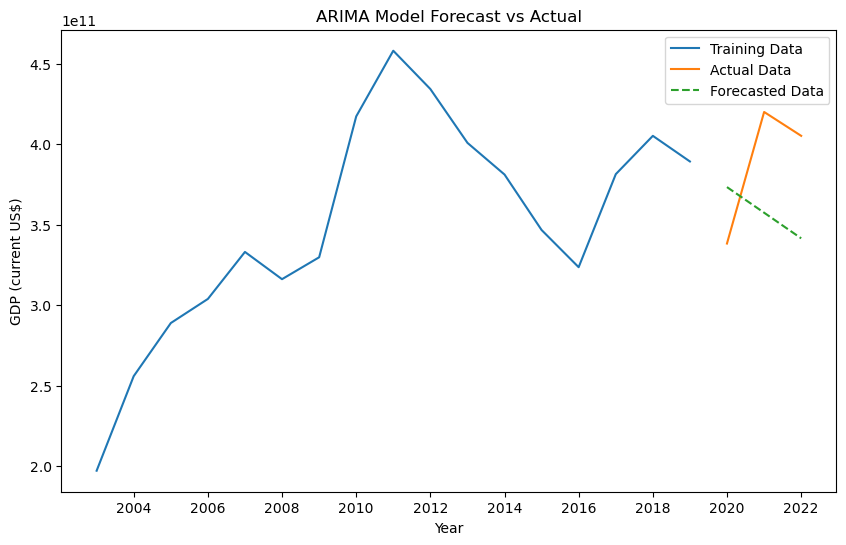

RMSE: 55435749899.87319
MAPE: 13.672101014211476
MAD: 53830000328.93473


In [8]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
mad = mean_absolute_error(test_data, forecast)

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'MAD: {mad}')


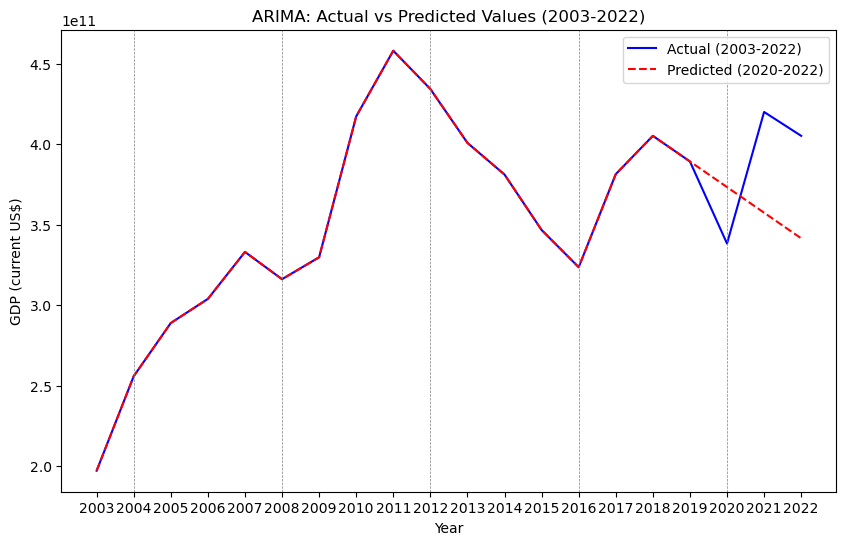

In [9]:
import matplotlib.pyplot as plt
import numpy as np

actual_values_arima = south_africa_data.loc['2020':'2022', 'GDP (current US$)'].values
combined_values_arima = np.concatenate((south_africa_data.loc['2003':'2019', 'GDP (current US$)'].values, forecast))

years_actual_arima = list(range(2003, 2023))
years_combined_arima = list(range(2003, 2020)) + list(range(2020, 2023))

plt.figure(figsize=(10, 6))
plt.plot(years_actual_arima, south_africa_data.loc['2003':'2022', 'GDP (current US$)'].values, label='Actual (2003-2022)', color='blue')
plt.plot(years_combined_arima, combined_values_arima, label='Predicted (2020-2022)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('ARIMA: Actual vs Predicted Values (2003-2022)')
plt.legend()

plt.xticks(np.arange(2003, 2023, 1))

for year in range(2004, 2023, 4):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)
    
plt.savefig('/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files/METHODOLOGY AND EVALS /Percentile and Scoring/EVALUATION - FORECASTING/plots/ARIMA(BEST)_actual_vs_predicted.png') 

plt.show()



In [10]:
import matplotlib.pyplot as plt
import numpy as np

actual_values = south_africa_gdp[2020:2023].values

combined_values = np.concatenate((south_africa_gdp[:2020].values, forecast))


combined_values

NameError: name 'south_africa_gdp' is not defined

In [11]:
forecast

Time
2020-01-01    3.733993e+11
2021-01-01    3.574686e+11
2022-01-01    3.415380e+11
Name: predicted_mean, dtype: float64

In [12]:
years_actual = years_actual[:len(south_africa_gdp[:2020].values)]
years_actual

NameError: name 'years_actual' is not defined

In [13]:
actual = south_africa_gdp
actual

NameError: name 'south_africa_gdp' is not defined

In [14]:
import matplotlib.pyplot as plt

actual_values = south_africa_gdp.values

combined_values = np.concatenate((south_africa_gdp[:2020].values, forecast))

years_all = list(range(2003, 2023))

plt.figure(figsize=(10, 6))
plt.plot(years_all, actual_values, label='Actual (2003-2022)', color='blue')
plt.plot(years_all, combined_values, label='Predicted (2020-2022)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.xticks(ticks=years_all, labels=years_all)
plt.legend()
plt.title('Actual vs Predicted Values (2003-2022)')
plt.show()



NameError: name 'south_africa_gdp' is not defined

In [31]:
actual_values

array([1.97018965e+11, 2.55806909e+11, 2.88867217e+11, 3.03858675e+11,
       3.33077117e+11, 3.16131259e+11, 3.29754061e+11, 4.17363823e+11,
       4.58199495e+11, 4.34400545e+11, 4.00886014e+11, 3.81198870e+11,
       3.46709790e+11, 3.23585510e+11, 3.81448815e+11, 4.05260724e+11,
       3.89330032e+11, 3.38291396e+11, 4.20117812e+11, 4.05270850e+11])

In [32]:
combined_values

array([1.97018965e+11, 2.55806909e+11, 2.88867217e+11, 3.03858675e+11,
       3.33077117e+11, 3.16131259e+11, 3.29754061e+11, 4.17363823e+11,
       4.58199495e+11, 4.34400545e+11, 4.00886014e+11, 3.81198870e+11,
       3.46709790e+11, 3.23585510e+11, 3.81448815e+11, 4.05260724e+11,
       3.89330032e+11, 3.38291396e+11, 4.20117812e+11, 4.05270850e+11,
       3.73399341e+11, 3.57468649e+11, 3.41537957e+11])

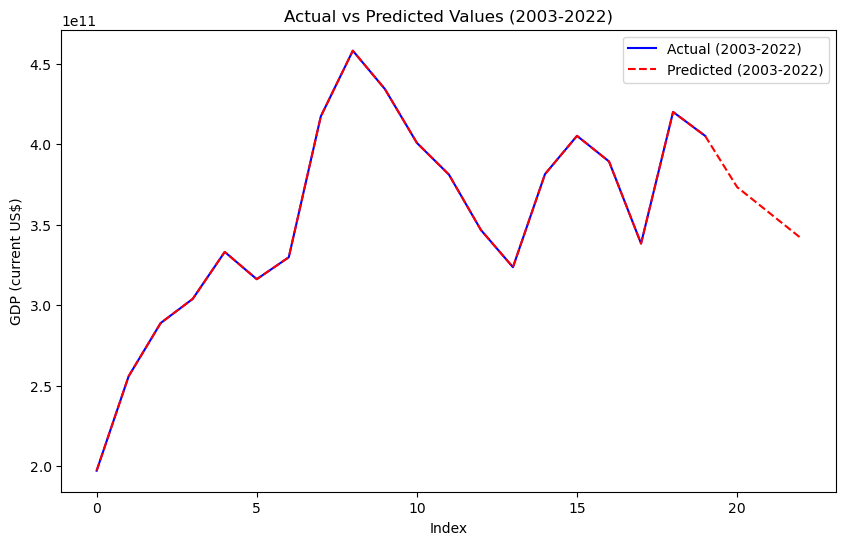

In [35]:
import matplotlib.pyplot as plt

actual_values_up_to_2019 = south_africa_gdp[:2020].values

combined_values = np.concatenate((actual_values_up_to_2019, forecast.values))

plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual (2003-2022)', color='blue')
plt.plot(combined_values, label='Predicted (2003-2022)', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.title('Actual vs Predicted Values (2003-2022)')
plt.show()
